In [4]:
library(data.table)
#library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)
library(lubridate)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘readr’

The following object is masked from ‘package:scales’:

    col_factor

Loading required package: xts
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘dplyr’

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from

In [5]:
#import dataset 
df<- read.csv("UWenergy_benchmarking.csv")
head(df)
colnames(df)

X,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,...,ThirdLargestPropertyUseTypeGFA,Electricity.kWh.,SteamUse.kBtu.,NaturalGas.therms.,ComplianceStatus,ComplianceIssue,Electricity.kBtu.,NaturalGas.kBtu.,TotalGHGEmissions,GHGEmissionsIntensity
0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,,,NA,...,NA,44327760,122879824,5128,Compliant,No Issue,151246317,512795,11031.5,6.8
1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,NA,13031380,60208736,69,Compliant,No Issue,44463069,6909,5234.6,43.7
2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,...,NA,4929713,30872392,0,Compliant,No Issue,16820181,0,2652.1,15.5
3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,NA,0,0,0,Compliant,No Issue,NA,NA,NA,NA
4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,...,NA,3524310,42968548,0,Compliant,No Issue,12024946,0,3630.7,25.8
5,49977,2020,UW - HITCHCOCK HALL,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,NA,1994790,6047404,0,Compliant,No Issue,6806223,0,538.2,4.6


[1] "X"                               "OSEBuildingID"                  
 [3] "DataYear"                        "BuildingName"                   
 [5] "BuildingType"                    "TaxParcelIdentificationNumber"  
 [7] "Address"                         "City"                           
 [9] "State"                           "ZipCode"                        
[11] "Latitude"                        "Longitude"                      
[13] "Neighborhood"                    "CouncilDistrictCode"            
[15] "YearBuilt"                       "NumberofFloors"                 
[17] "NumberofBuildings"               "PropertyGFATotal"               
[19] "PropertyGFABuilding.s."          "PropertyGFAParking"             
[21] "ENERGYSTARScore"                 "SiteEUIWN.kBtu.sf."             
[23] "SiteEUI.kBtu.sf."                "SiteEnergyUse.kBtu."            
[25] "SiteEnergyUseWN.kBtu."           "SourceEUIWN.kBtu.sf."           
[27] "SourceEUI.kBtu.sf."              "EPAPropertyType"                
[29] "LargestPropertyUseType"          "LargestPropertyUseTypeGFA"      
[31] "SecondLargestPropertyUseType"    "SecondLargestPropertyUseTypeGFA"
[33] "ThirdLargestPropertyUseType"     "ThirdLargestPropertyUseTypeGFA" 
[35] "Electricity.kWh."                "SteamUse.kBtu."                 
[37] "NaturalGas.therms."              "ComplianceStatus"               
[39] "ComplianceIssue"                 "Electricity.kBtu."              
[41] "NaturalGas.kBtu."                "TotalGHGEmissions"              
[43] "GHGEmissionsIntensity"

In [6]:
summary(df)

       X        OSEBuildingID      DataYear   
 Min.   :0.00   Min.   :49770   Min.   :2020  
 1st Qu.:1.75   1st Qu.:49974   1st Qu.:2020  
 Median :3.50   Median :49976   Median :2020  
 Mean   :3.50   Mean   :50058   Mean   :2020  
 3rd Qu.:5.25   3rd Qu.:50085   3rd Qu.:2020  
 Max.   :7.00   Max.   :50412   Max.   :2020  
                                              
                                         BuildingName         BuildingType
 University of Washington Medical Center (UWMC):1     NonResidential:8    
 UW - FOEGE BUILDING (genome sciences)         :1                         
 UW - HEALTH SCIENCES J-WING                   :1                         
 UW - HEALTH SCIENCES K-WING                   :1                         
 UW - HEALTH SCIENCES RR-WING                  :1                         
 UW - HITCHCOCK HALL                           :1                         
 (Other)                                       :2                         
 TaxParcelIdentification

In [7]:
df$NumberofFloors #'#7FF6FC'

[1] 10  5  4  4  4  5  5  4

In [8]:
df$NumberofFloors= as.numeric(df$NumberofFloors)

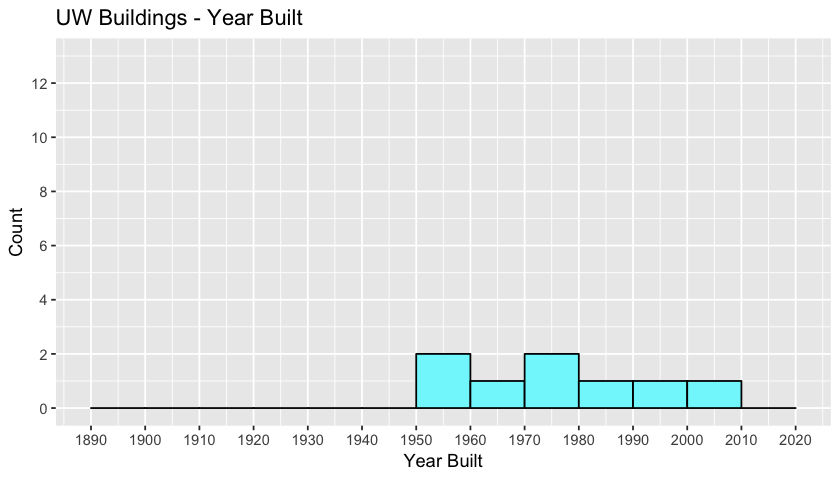

In [9]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(df, aes(x=YearBuilt))+ 
    geom_histogram(fill='#7FF6FC',colour='black', binwidth = 10, breaks = c(1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020)) +
    scale_y_continuous(limits=c(0,13),breaks = c(0,2,4,6,8,10,12))+
    scale_x_continuous(limits=c(1890,2020),breaks = c(1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020))+
    xlab('Year Built') +
    ylab('Count') +
    ggtitle('UW Buildings - Year Built ')

    #guides(fill=guide_legend(title="ENERGYSTARScore"))

In [10]:
df$ENERGYSTARScore= as.numeric(df$ENERGYSTARScore)

Warning message:
“Removed 7 rows containing non-finite values (stat_bin).”

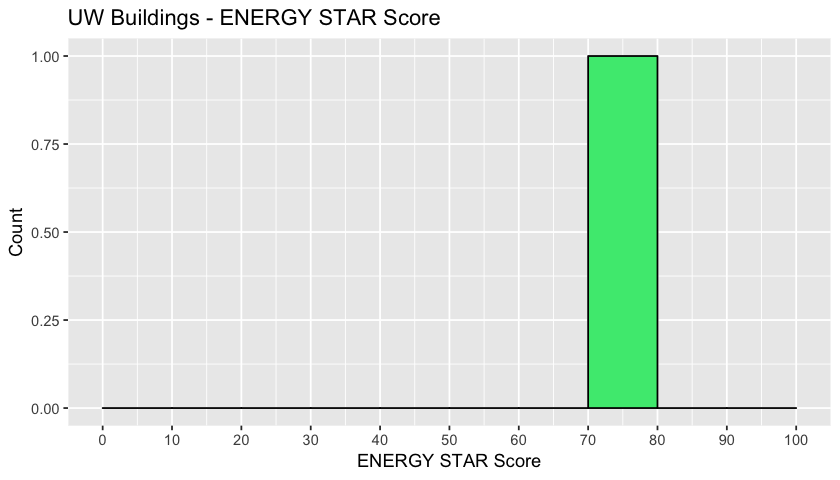

In [11]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(df, aes(x=ENERGYSTARScore))+ 
    geom_histogram(fill='#47E87F',colour='black', binwidth = 10, breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    #scale_y_continuous(limits=c(0,13),breaks = c(0,2,4,6,8,10,12))+
    scale_x_continuous(limits=c(0, 100),breaks = c(0,10,20,30,40,50,60,70,80,90,100))+
    xlab('ENERGY STAR Score') +
    ylab('Count') +
    ggtitle('UW Buildings - ENERGY STAR Score ')






Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

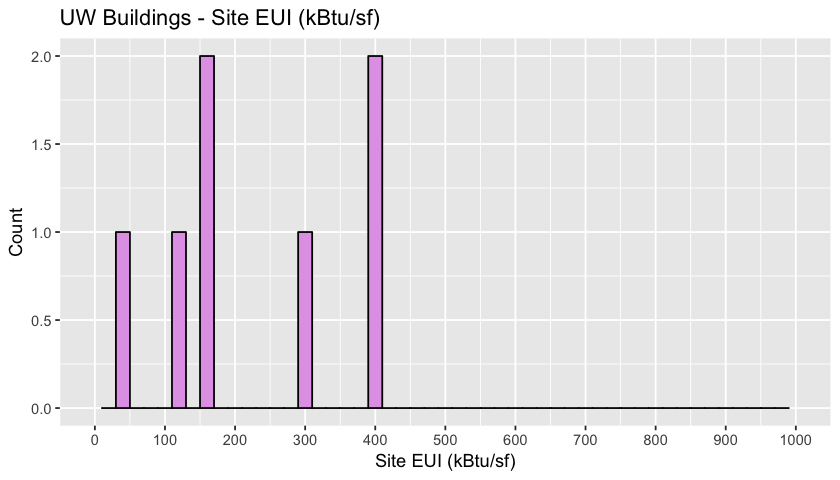

In [12]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(df, aes(x=SiteEUI.kBtu.sf.))+ 
    geom_histogram(fill='#E2A4E8',colour='black', binwidth = 20,)+ #breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    #scale_y_continuous(limits=c(0,13),breaks = c(0,2,4,6,8,10,12))+
    scale_x_continuous(limits=c(0, 1000),breaks = c(0,100,200,300,400,500,600,700,800,900,1000))+
    xlab('Site EUI (kBtu/sf)') +
    ylab('Count') +
    ggtitle('UW Buildings - Site EUI (kBtu/sf)')



In [13]:
newdata1 <- df[order(df$YearBuilt),]

newdata1$this= newdata1$YearBuilt
newdata1

,X,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,...,Electricity.kWh.,SteamUse.kBtu.,NaturalGas.therms.,ComplianceStatus,ComplianceIssue,Electricity.kBtu.,NaturalGas.kBtu.,TotalGHGEmissions,GHGEmissionsIntensity,this
1,0,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,,,NA,...,44327760,122879824,5128,Compliant,No Issue,151246317,512795,11031.5,6.8,1960
5,4,49976,2020,UW - HEALTH SCIENCES RR-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,...,3524310,42968548,0,Compliant,No Issue,12024946,0,3630.7,25.8,1960
3,2,49974,2020,UW - HEALTH SCIENCES J-WING,NonResidential,1625049001,1705 NE PACIFIC ST,SEATTLE,WA,98195,...,4929713,30872392,0,Compliant,No Issue,16820181,0,2652.1,15.5,1965
8,7,50412,2020,UW- MAGNUSON HEALTH SCIENCES CENTER H,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195,...,6567483,0,0,Compliant,No Issue,22408252,0,119.2,0.6,1975
7,6,50409,2020,UW- MAGNUSON HEALTH SCIENCES CENTER BB,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195,...,3122749,0,0,Compliant,No Issue,10654820,0,56.7,0.2,1980
6,5,49977,2020,UW - HITCHCOCK HALL,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,1994790,6047404,0,Compliant,No Issue,6806223,0,538.2,4.6,1982
4,3,49975,2020,UW - HEALTH SCIENCES K-WING,NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,0,0,0,Compliant,No Issue,NA,NA,NA,NA,1995
2,1,49973,2020,UW - FOEGE BUILDING (genome sciences),NonResidential,1625049001,4000 15TH AVE NE,SEATTLE,WA,98105,...,13031380,60208736,69,Compliant,No Issue,44463069,6909,5234.6,43.7,2006


In [131]:
newdata <- df[order(df$ENERGYSTARScore),]

newdata$this= newdata$ENERGYSTARScore
newdata

,X,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,...,Electricity.kWh.,SteamUse.kBtu.,NaturalGas.therms.,ComplianceStatus,ComplianceIssue,Electricity.kBtu.,NaturalGas.kBtu.,TotalGHGEmissions,GHGEmissionsIntensity,this
3,344,495,2020,4245 ROOSEVELT - UW MEDICAL CENTER,NonResidential,1145000310,4245 ROOSEVELT WAY NE,SEATTLE,WA,98105,...,2499566,0,3680,Compliant,No Issue,8528519,368009,64.9,0.7,20
7,3053,29390,2020,COMMODORE DUCHESS APTS (UW HOUSING),Multifamily MR (5-9),1142002395,4005 15TH AVE NE,SEATTLE,WA,98105,...,377495,8245736,536,Compliant,No Issue,1288014,53594,694.2,7.1,25
25,3251,49979,2020,UW - LANDER HALL DORM,NonResidential,1625049001,1201 NE CAMPUS PKY,SEATTLE,WA,98105,...,2156967,0,70180,Compliant,No Issue,7359571,7017995,411.9,2.5,32
1,233,364,2020,UW TOWER BLDG COMPLEX,NonResidential,1142000280,4333 BROOKLYN AVE NE,SEATTLE,WA,98105,...,8081324,0,0,Compliant,No Issue,27573477,0,146.6,0.3,70
31,3338,50092,2020,TERRY & MAPLE HALL UW,Multifamily MR (5-9),1142002345,1101 NE CAMPUS PKWY,SEATTLE,WA,98105,...,2149144,0,91479,Compliant,No Issue,7332879,9147891,524.8,1.6,76
29,3255,49983,2020,UW - POPLAR HALL DORM,NonResidential,1625049001,3715 W STEVENS WAY NE,SEATTLE,WA,98195,...,888836,0,4465,Compliant,No Issue,3032708,446521,39.8,0.4,77
11,3157,49770,2020,University of Washington Medical Center (UWMC),NonResidential,1625049001,1959 NE PACIFIC ST,,,NA,...,44327760,122879824,5128,Compliant,No Issue,151246317,512795,11031.5,6.8,78
10,3138,49716,2020,UW - ALDER HALL DORM,NonResidential,1142002345,1315 NE CAMPUS PKY,SEATTLE,WA,98105,...,1493826,0,22293,Compliant,No Issue,5096934,2229276,145.5,0.8,85
17,3243,49970,2020,UW - CEDAR HALL DORM,NonResidential,1625049001,1112 NE 41ST ST,SEATTLE,WA,98105,...,922524,0,14219,Compliant,No Issue,3147652,1421892,92.3,0.5,94
5,845,20056,2020,NORDHEIM COURT (UW HOUSING),Multifamily LR (1-4),925049382,5000 25TH AVE NE,SEATTLE,WA,98105,...,1172647,0,25254,Compliant,No Issue,4001072,2525369,155.4,0.6,96


In [128]:
newdata2 <- df[order(df$SiteEUI.kBtu.sf.),]
newdata2$this= newdata2$SiteEUI.kBtu.sf.

newdata2

,X,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,...,Electricity.kWh.,SteamUse.kBtu.,NaturalGas.therms.,ComplianceStatus,ComplianceIssue,Electricity.kBtu.,NaturalGas.kBtu.,TotalGHGEmissions,GHGEmissionsIntensity,this
9,3137,49715,2020,UW - ELM HALL DORM,NonResidential,1142002135,1218 NE CAMPUS PKWY,SEATTLE,WA,98105,...,704183,0,18270,Compliant,No Issue,2402672,1827029,109.8,0.8,20.4
26,3252,49980,2020,UW - MERCER HALL DORM,NonResidential,1625049001,1009 NE PACIFIC ST,SEATTLE,WA,98105,...,1832619,0,39353,Compliant,No Issue,6252896,3935290,242.3,2.7,25.4
17,3243,49970,2020,UW - CEDAR HALL DORM,NonResidential,1625049001,1112 NE 41ST ST,SEATTLE,WA,98105,...,922524,0,14219,Compliant,No Issue,3147652,1421892,92.3,0.5,25.9
6,902,20242,2020,THE COLLEGIANA (UW MED),NonResidential,1142000445,4311 12TH AVE NE,SEATTLE,WA,98105,...,183904,0,0,Compliant,No Issue,627482,0,3.3,0.2,30.5
29,3255,49983,2020,UW - POPLAR HALL DORM,NonResidential,1625049001,3715 W STEVENS WAY NE,SEATTLE,WA,98195,...,888836,0,4465,Compliant,No Issue,3032708,446521,39.8,0.4,35.9
5,845,20056,2020,NORDHEIM COURT (UW HOUSING),Multifamily LR (1-4),925049382,5000 25TH AVE NE,SEATTLE,WA,98105,...,1172647,0,25254,Compliant,No Issue,4001072,2525369,155.4,0.6,37.4
10,3138,49716,2020,UW - ALDER HALL DORM,NonResidential,1142002345,1315 NE CAMPUS PKY,SEATTLE,WA,98105,...,1493826,0,22293,Compliant,No Issue,5096934,2229276,145.5,0.8,37.5
33,3497,50409,2020,UW- MAGNUSON HEALTH SCIENCES CENTER BB,NonResidential,1625049001,1959 NE PACIFIC ST,SEATTLE,WA,98195,...,3122749,0,0,Compliant,No Issue,10654820,0,56.7,0.2,42.8
30,3256,49984,2020,UW - SAVERY HALL,NonResidential,1625049001,4100 SPOKANE LN NE,SEATTLE,WA,98195,...,1453847,332755,0,Compliant,No Issue,4960526,0,54.0,0.5,44.6
31,3338,50092,2020,TERRY & MAPLE HALL UW,Multifamily MR (5-9),1142002345,1101 NE CAMPUS PKWY,SEATTLE,WA,98105,...,2149144,0,91479,Compliant,No Issue,7332879,9147891,524.8,1.6,50.7


Warning message:
“Removed 2 rows containing missing values (position_stack).”

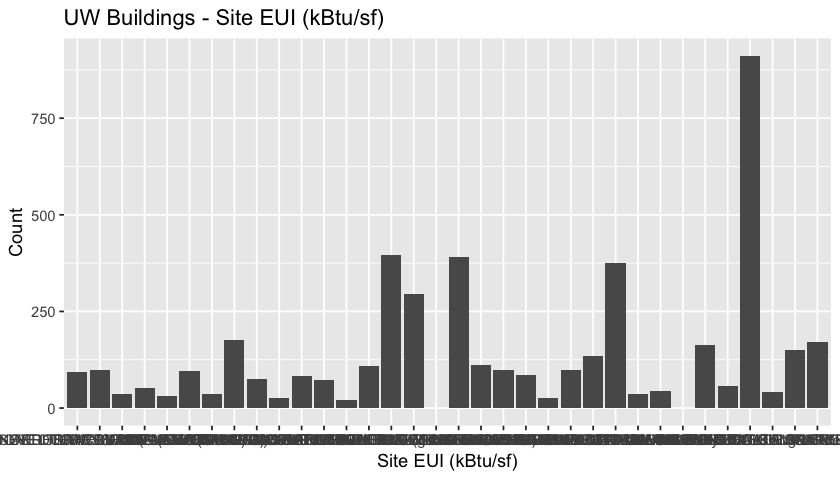

In [117]:
ggplot(df, aes(y=SiteEUI.kBtu.sf., x=BuildingName ))+ 
    geom_bar(stat="identity")+ #breaks = c(0,10,20,30,40,50,60,70,80,90,100)) +
    #scale_y_continuous(limits=c(0,13),breaks = c(0,2,4,6,8,10,12))+
    #scale_x_continuous(limits=c(0, 1000),breaks = c(0,100,200,300,400,500,600,700,800,900,1000))+
    xlab('Site EUI (kBtu/sf)') +
    ylab('Count') +
    ggtitle('UW Buildings - Site EUI (kBtu/sf)')



